# Answer template

Please use this notebook for your coursework. Feel free to add more cells for your code and answers, but try to stick to this format. This will make it easier to mark everyone's work fairly.

___________________

In [456]:
# run this
!pip list


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Package           Version
----------------- ------------
asttokens         2.4.1
blinker           1.7.0
click             8.1.7
colorama          0.4.6
comm              0.2.0
contourpy         1.2.0
cycler            0.12.1
debugpy           1.8.0
decorator         5.1.1
english-words     2.0.1
executing         2.0.1
Flask             3.0.0
fonttools         4.44.0
iniconfig         2.0.0
ipykernel         6.26.0
ipython           8.17.2
itsdangerous      2.1.2
jedi              0.19.1
Jinja2            3.1.2
joblib            1.3.2
jupyter_client    8.6.0
jupyter_core      5.5.0
kiwisolver        1.4.5
MarkupSafe        2.1.3
matplotlib        3.8.1
matplotlib-inline 0.1.6
nest-asyncio      1.5.8
nltk              3.8.1
numpy             1.26.0
packaging         23.2
pandas            2.1.1
parso             0.8.3
Pillow            10.1.0
pip               23.2.1
platformdirs      3.11.0
pluggy            1.3.0
prompt-toolkit    3.0.39
psutil            5.9.6
pure-eval         0.2.

# Part A – Exploratory data analysis and data visualisation 

1. Using the pandas library, read the file dataset1.csv into a dataframe. Print or display the first five rows of the dataset. [1 mark]

In [457]:
import pandas as pd
df1 = pd.read_csv('dataset1.csv')
df1.head()

,Monastery,Latitude,Longitude,City,Country,Administrative Region,Historical Region,Starting,Ending,Monastery_index
0,Cistercians,47.13,15.28,Seckau,Austria,Steiermark,STYRIA (AUSTRIA),1130,1958,0
1,Cistercians,48.05,16.13,Vienne,Austria,Niederoesterreich,STYRIA (AUSTRIA),1135,2011,0
2,Cistercians,48.61,15.20,Sanct Pölten,Austria,Niederoesterreich,STYRIA (AUSTRIA),1138,2011,0
3,Cistercians,48.20,14.74,Linz,Austria,Oberoesterreich,STYRIA (AUSTRIA),1142,1784,0
4,Cistercians,48.32,14.17,Linz,Austria,Oberoesterreich,STYRIA (AUSTRIA),1146,1945,0


2. Make a scatterplot from the dataset, with the Longitude column on the x axis, the Latitude column on the y axis, and the colour corresponding to the Monastery_index column. Within the scatterplot function, set the colour map to ’rainbow’. The result should be a scatterplot showing the position of every monastery, with different colours for monasteries with different values in Monastery_index.  [1 mark]

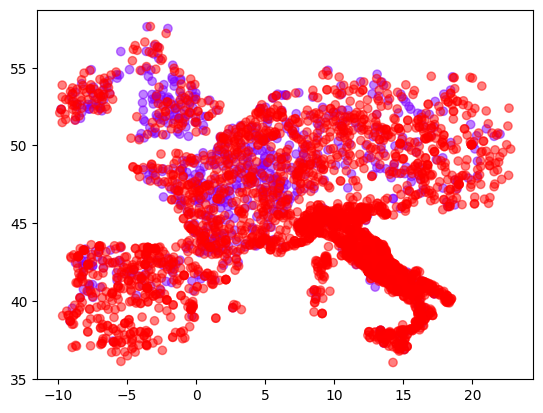

In [458]:
from matplotlib import pyplot as plt
ax = plt.scatter(df1['Longitude'], df1['Latitude'], c=df1['Monastery_index'], cmap='rainbow', alpha=0.5)

3. Plot a histogram for the monastery starting year of activity, represented in the Starting column.
Add the title “Starting year” to the plot. [1 mark]

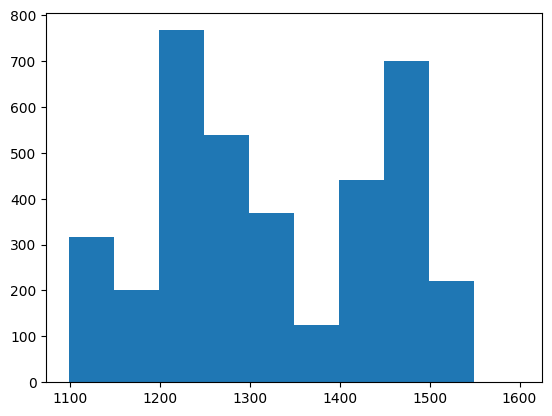

In [459]:
ax = plt.hist(df1['Starting'])

4. Make a figure with two histograms, still using the Starting column:

a) One histogram representing the Cistercian monasteries, corresponding to rows in the dataframe where the Monastery column is equal to 'Cistercians'.

b) And one histogram representing the Franciscan monasteries, corresponding to rows in the dataframe where the Monastery column is equal to 'Franciscans'.

c) Add a legend indicating which histogram corresponds to which type of monastery.

d) Add the title “Starting year” to the figure. 

[2 marks]

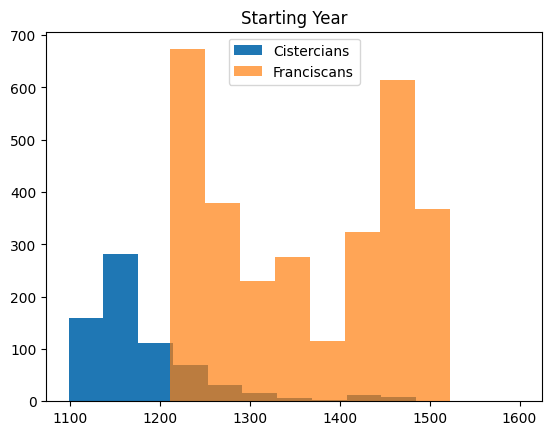

In [460]:

df1_cistercians = df1[df1['Monastery'] == 'Cistercians']
df1_franciscan = df1[df1['Monastery'] == 'Franciscans']
#draw a histogram on the first subplot
ax = plt.hist(df1_cistercians['Starting'])
ax = plt.hist(df1_franciscan['Starting'], alpha=0.7)
ax = plt.legend(['Cistercians','Franciscans'])
ax = plt.title('Starting Year')


5. Repeat numbers 3 and 4, but for the Ending column. Add the title “Ending year” to the plot.
[2 marks]

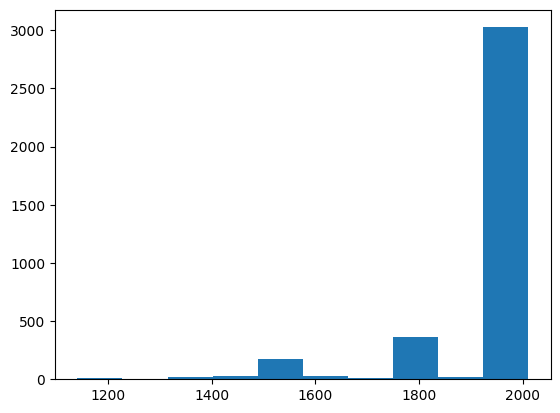

In [461]:
ax = plt.hist(df1['Ending'])

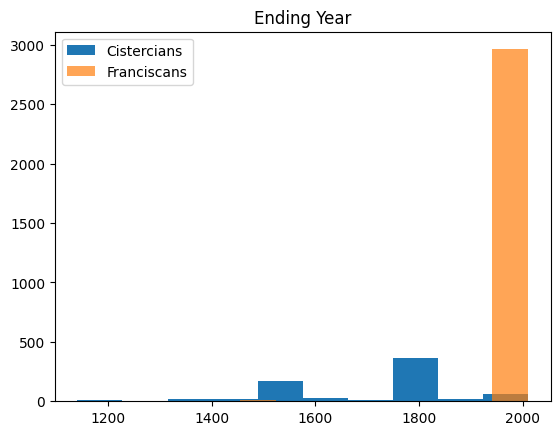

In [462]:
df1_cistercians = df1[df1['Monastery'] == 'Cistercians']
df1_franciscan = df1[df1['Monastery'] == 'Franciscans']
#draw a histogram on the first subplot
ax = plt.hist(df1_cistercians['Ending'])
ax = plt.hist(df1_franciscan['Ending'], alpha=0.7)
ax = plt.legend(['Cistercians','Franciscans'])
ax = plt.title('Ending Year')

6. Count the number of times each country appears in the Country column. Use that to make a bar plot, showing one bar for each country, with the bar height representing how many times each country appears in the Country column. This corresponds to the number of monasteries found in each country.
[2 marks]

In [463]:
df1['Country'].value_counts()

Country
Italy             1453
France             724
Spain              418
Germany            276
UK                 180
Poland             129
Ireland             90
Hungary             69
Czech Republic      63
Portugal            59
Belgium             55
Netherlands         49
Austria             48
Switzerland         28
Slovakia            21
Slovenia            16
Name: count, dtype: int64

C:\Users\Dylan\AppData\Local\Temp\ipykernel_18916\1509569701.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a = ax.set_xticklabels(df1['Country'].value_counts().index, rotation=90)


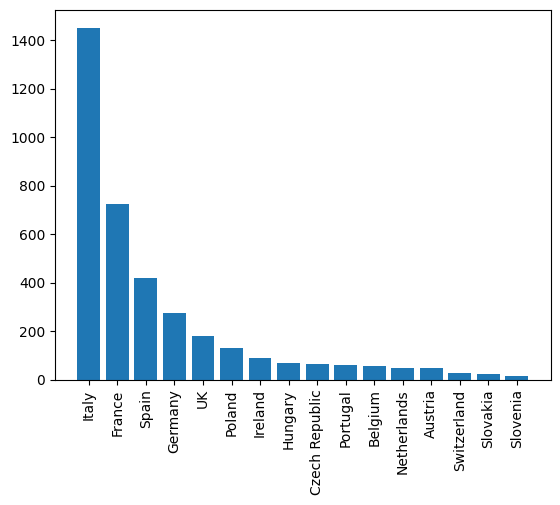

In [464]:
fig, ax = plt.subplots()
a = plt.bar(df1['Country'].value_counts().index, df1['Country'].value_counts())
a = ax.set_xticklabels(df1['Country'].value_counts().index, rotation=90)

_____________________

# Part B – Training classifiers

7.	Define a variable X corresponding to the Starting and Ending columns of the dataset, and a variable y corresponding to the Monastery_index column. [1 mark]

In [465]:
X = df1[['Starting','Ending']]
y = df1['Monastery_index']
X.head()

,Starting,Ending
0,1130,1958
1,1135,2011
2,1138,2011
3,1142,1784
4,1146,1945


In [466]:
y#0=Cistercians, 1=Franciscans

0       0
1       0
2       0
3       0
4       0
       ..
3673    1
3674    1
3675    1
3676    1
3677    1
Name: Monastery_index, Length: 3678, dtype: int64

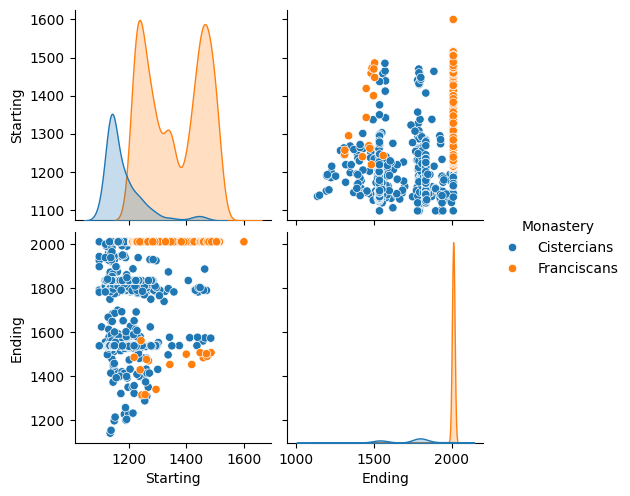

In [467]:
#use seaborn to draw a scatter plot matrix
import seaborn as sns
tempdf = df1[['Starting','Ending','Monastery']]
#use seaborn to draw a scatter plot matrix
sns.pairplot(tempdf, hue='Monastery')


8.	Perform a train-test split, separating X and y into a training test and a test set, leaving 33% of the data in the test set. [1 mark]

In [468]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

9.	Classification using a Perceptron:

a)	Fit a perceptron to the training data, and use it to predict y values for the test set.
[1 mark]

b)	Calculate the fraction of data points in the test set where the predicted y values and the actual y values differ. This fraction should be equal to zero if the prediction is perfect, and equal to 1 if the prediction is wrong for 100% of the test set. Print the value of that fraction in decimals (like 0.01, 0.2394, or 0.9999923).  [2 marks]

c)	Plot a confusion matrix showing how well the classifier performs on the test set. [1 mark]

d)	Treating “Franciscan” as “Positive” and “Cistercian” as “Negative”, Print out the precision, recall, accuracy and F1 score of the perceptron. [2 marks]

In [469]:
#a)
from sklearn.linear_model import Perceptron
clf = Perceptron()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [470]:
#b)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8187808896210873


[Text(0, 0.5, 'Cistercians'), Text(0, 1.5, 'Franciscans')]

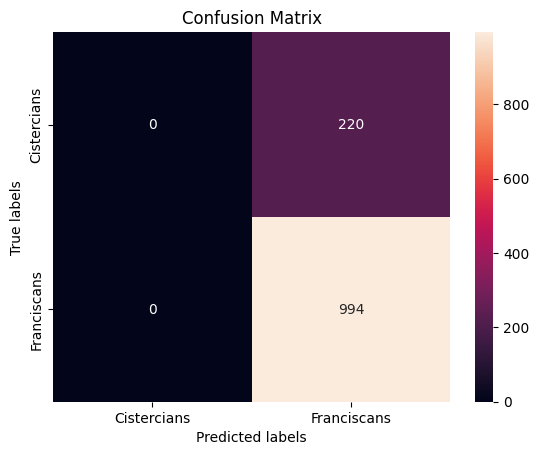

In [471]:
#c)
from sklearn.metrics import confusion_matrix
# create a confussion matrix and display it with the labels as the monastery names



cm = confusion_matrix(y_test, y_pred)
import seaborn as sns  

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Cistercians','Franciscans'])
ax.yaxis.set_ticklabels(['Cistercians','Franciscans'])

In [472]:
#-------------------------------------------------------------------->look over this


from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print(precision_score(y_test, y_pred, pos_label=1))
print(recall_score(y_test, y_pred, pos_label=1))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, pos_label=1))


0.8187808896210873
1.0
0.8187808896210873
0.9003623188405797


10.	Classification using Logistic Regression: do the same as the question above, but using the logistic regression classifier. [4 marks]

In [473]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

#use logisitc regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [474]:

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

0.018945634266886325


[Text(0, 0.5, 'Cistercians'), Text(0, 1.5, 'Franciscans')]

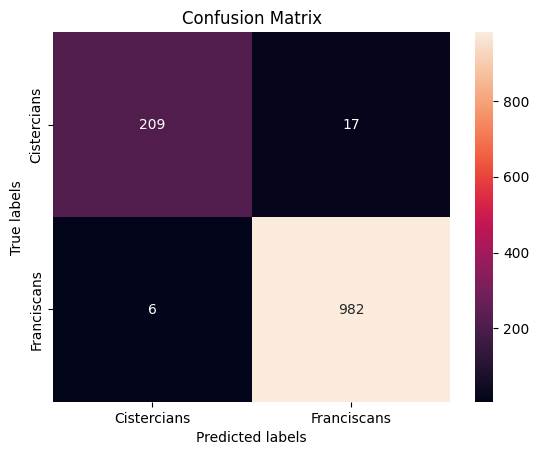

In [475]:
#draw a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
import seaborn as sns  

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax) 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Cistercians','Franciscans'])
ax.yaxis.set_ticklabels(['Cistercians','Franciscans'])

For open-ended questions like the ones below, write your answers in a new cell of code, either as a commented-out line starting with #, or as a markdown cell. Indicate what question you’re answering, by copying the question as well. For example:

11.	Explain the importance of the train-test split in machine learning. What might happen if you don’t have a proper split? [ 2 marks ]


to have reliable test data and to prevent the model from overfitting

12.	Which classifier (Perceptron or Logistic Regression) performed better at this task? Explain how you’ve arrived at this answer. [4 marks] 

<h1>look over this<h1>
the logistic regression performed better overall as the perceptron confusion matrix implies that the perceptron classified every data point as franciscans whereas the logistic regression confusion matrix shows a better classfication of the datapoints 

13.	If you run the code from questions 8, 9, and 10 again, do the scores (precision, recall, accuracy, F1) change? Why (or why not)? Explain where those scores come from, and how do they change (or don't change) if you run the code again. [3 marks]

**>>> Answer by editing this cell (double-click here)**

_______________

# Part C – Linear Regression

14. Read the file `dataset2.csv` into a dataframe. Make four scatterplots, with different variables (different columns) on the x and y axes, with the variable `quality` on the colour axis. For each scatterplot, choose a different pair of x and y variables, which cannot include `quality`. [1 mark]

In [476]:
df2 = pd.read_csv('dataset2.csv')
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


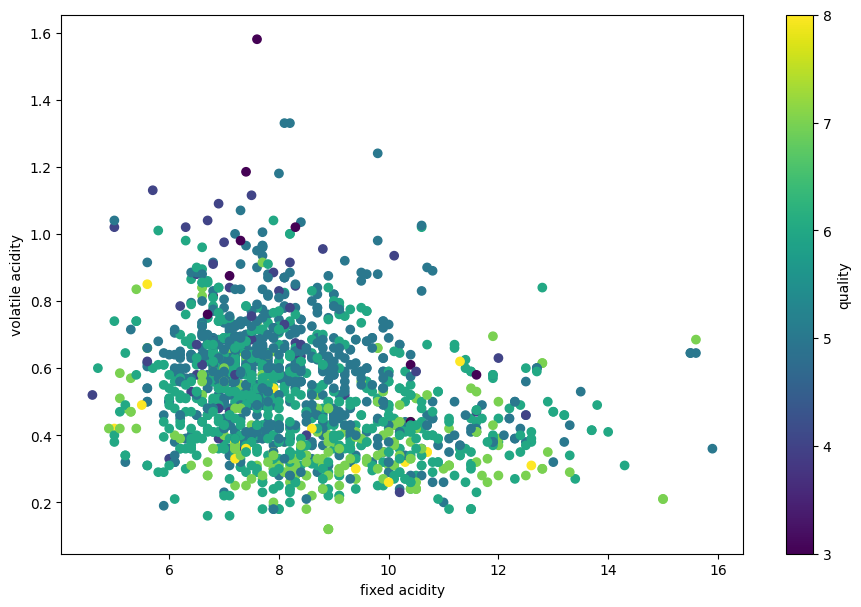

In [477]:
plt.figure(figsize=(11, 7))
scatter = plt.scatter(df2['fixed acidity'], df2['volatile acidity'],c=df2['quality'],cmap='viridis')

cbar = plt.colorbar(scatter, label='quality')
cbar.set_ticks([3,4,5,6,7,8])

#labels
plt.xlabel('fixed acidity')
plt.ylabel('volatile acidity')
plt.show()

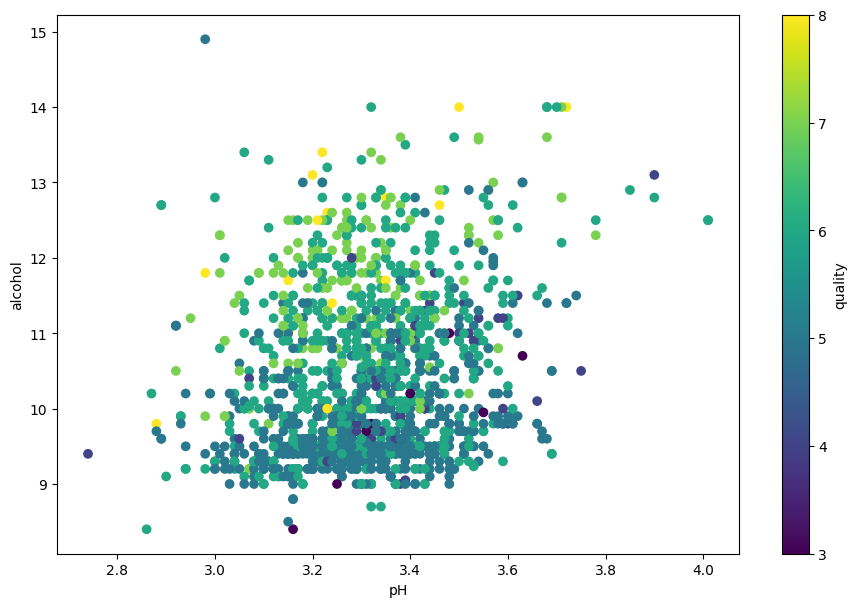

In [478]:

plt.figure(figsize=(11, 7))
scatter = plt.scatter(df2['pH'], df2['alcohol'],c=df2['quality'],cmap='viridis')

cbar = plt.colorbar(scatter, label='quality')
cbar.set_ticks([3,4,5,6,7,8])

#labels
plt.xlabel('pH')
plt.ylabel('alcohol')
plt.show()

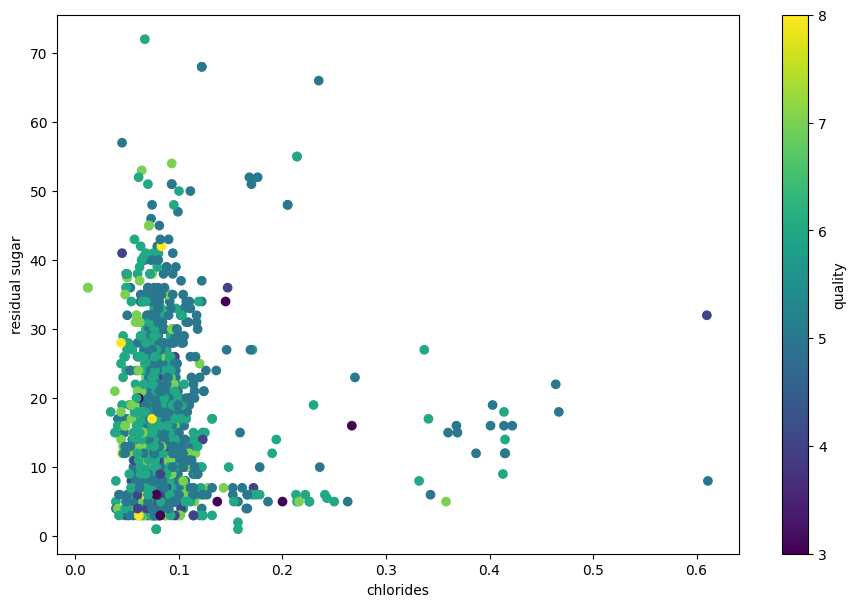

In [479]:

plt.figure(figsize=(11, 7))
scatter = plt.scatter(df2['chlorides'], df2['free sulfur dioxide'],c=df2['quality'],cmap='viridis')

cbar = plt.colorbar(scatter, label='quality')
cbar.set_ticks([3,4,5,6,7,8])

#labels
plt.xlabel('chlorides')
plt.ylabel('residual sugar')
plt.show()

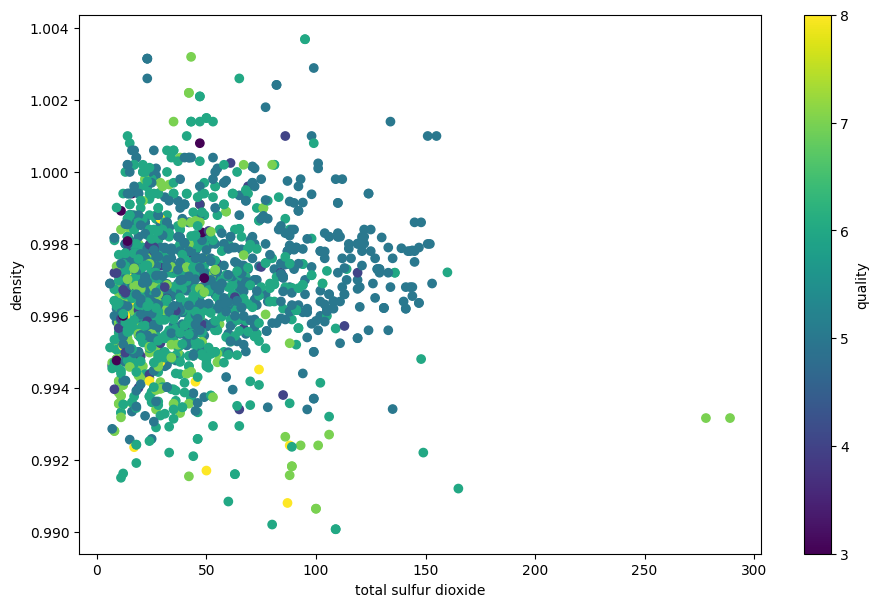

In [480]:

plt.figure(figsize=(11, 7))
scatter = plt.scatter(df2['total sulfur dioxide'], df2['density'],c=df2['quality'],cmap='viridis')

cbar = plt.colorbar(scatter, label='quality')
cbar.set_ticks([3,4,5,6,7,8])

#labels
plt.xlabel('total sulfur dioxide')
plt.ylabel('density')
plt.show()

15. Print the Pearson correlation between the pairs of variables you have included in the scatterplots. 
For every pair of variables, print the names of the variables, and the corresponding correlation. 
[1 mark]

In [481]:
from scipy.stats import pearsonr
vars = [['fixed acidity','volatile acidity'],['pH','alcohol'],['chlorides','residual sugar'],['total sulfur dioxide','density']]
for i in range(4):
    x = vars[i][0]
    y = vars[i][1]
    print(x+'-'+y,':', pearsonr(df2[x],df2[y])[0])

fixed acidity-volatile acidity : -0.2561308947703822
pH-alcohol : 0.20563250850549838
chlorides-residual sugar : 0.05560953520353212
total sulfur dioxide-density : 0.0712694762031032


16. Linear regression: [2 marks]
    
a) Choosing the input variable X corresponds to any three columns of the dataset, except for `quality`, and the variable y corresponds to the `quality` column.

b) Fit a linear regression between X and y.

c) Print out the R2 score of the linear regression.

d) Print out the linear regression model’s slope coefficients and intercept.

In [482]:
#a)
X = df2[['fixed acidity','volatile acidity','citric acid']]
y = df2['quality']

In [483]:
#b)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
X_train.head()

,fixed acidity,volatile acidity,citric acid
625,6.8,0.69,0.00
1295,6.6,0.63,0.00
1358,7.4,0.64,0.17
320,9.8,0.66,0.39
339,12.5,0.28,0.54


In [484]:
#c
from sklearn.metrics import r2_score
clf.score(X_test, y_test)

0.1510930217225962

In [485]:
#d)
print(clf.coef_)
print(clf.intercept_)

[ 0.0406663  -1.76407397 -0.28455976]
6.315539856955237


17. K-fold cross-validation [3 marks]

a) Using the same X and y variables defined in the question above, perform a K-fold cross-validation of the linear regression model, with K = 10.

b) For each fold, calculate the R2 score.

c) Print the mean and standard deviation of the five R2 scores.

In [486]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [487]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.score(X_test, y_test))

-0.303050871060367
0.1708158043417276
-0.11292551876784929
0.12618702249607128
-0.15285682623158325
0.157850118105476
-0.045339549567374515
0.16661902834865017
0.16995087809053477
0.1451221263075484


18.	If, rather than choosing three columns, you had used more columns to predict quality, would the R2 score of your model necessarily be higher? Why/why not? In which circumstances would it be higher or not? (Feel free to try it! But please provide a justification for your answer) [3 marks]

increasing the columns means more data for the model to train. This could increase the r2 score but some columns could have no impact towards the preciction on quality If we were to add those then the r2 score would not increase.

19.	Imagine you have two linear regressions, one with R2 = 0.80 and another with R2 = 0.90. Under what circumstances would the first model be preferable over the second one? What if instead you had two classifiers, one with accuracy = 80% and another with accuracy = 90%? [3 marks]


If the 0.8 model is less complex and easy to interpret. it may be preferred in situations where interpretability is more important then accuracy. Furthmore it could be that the 0.9 r2 model is overfitting. In context where the model is a classifer, it would generally mean that the higher accuracy model is preferable like the above statments where the 80% accurate model is simpler or more cost efficent. 

_____________________

# Part D – Clustering

20. K-means clustering:

a) Read the file `dataset3.csv` into a dataframe.

b) Define a variable X corresponding to the `Longitude` and `Latitude` columns of the dataset.

c) Using the K-means clustering algorithm and the variable X, cluster the trees 3 times, using k = 5, 10, 15.

d) Make a scatterplot showing the results of each clustering, with one colour for each cluster.
Suggestion: use a categorical colour map such as tab10 or tab20.
[2 marks]

In [488]:
#a)
df3 = pd.read_csv('dataset3.csv')
df3.head()

,Tree_ID,Address,Town,Tree_Species,Species_Desc,Common_Name,Age_Desc,Height,Spread,Trunk,Actual_Trunk,Condition,Latitude,Longitude
0,27092,"Clonard Court, Balbriggan",Balbriggan,ACSA,Acer saccharinum,Silver Maple,Semi-Mature,5.1-10 metres,3 to 6 metres,11cm to 20cm,18cm,Good,53.606325,-6.186424
1,29144,"Ridgewood Avenue, Forrest Great",Swords South,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,Up to 3 metres,1cm - 10cm,10cm,Fair - Poor,53.447465,-6.247613
2,29160,"Ridgewood Avenue, Forrest Great",Swords South,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,Up to 3 metres,11cm to 20cm,11cm,Good,53.447695,-6.248258
3,29400,"Ridgewood Avenue, Forrest Great",Swords South,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,Up to 3 metres,1cm - 10cm,10cm,Good,53.445606,-6.246236
4,246560,"Lanesborough Grove, Saint Margaret's",Santry,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,3 to 6 metres,11cm to 20cm,13cm,Fair to Good,53.404309,-6.291646


In [489]:
X = df3[['Longitude','Latitude']]
X.head()

,Longitude,Latitude
0,-6.186424,53.606325
1,-6.247613,53.447465
2,-6.248258,53.447695
3,-6.246236,53.445606
4,-6.291646,53.404309


In [490]:
from sklearn.cluster import KMeans
kMeans_predicted = []
bins = [5,10,15]
for i in bins:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    kMeans_predicted.append(y_pred)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


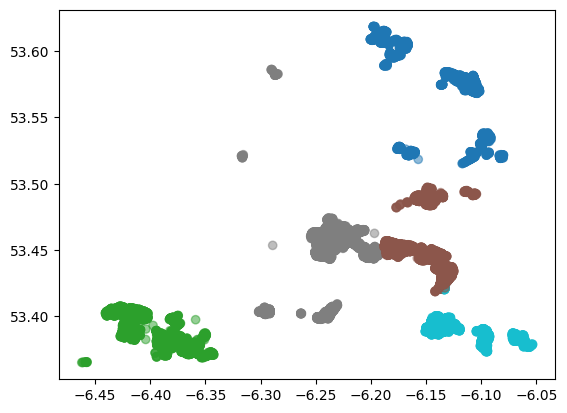

In [491]:
#make a scatter plot
scatter = plt.scatter(df3['Longitude'], df3['Latitude'],c=kMeans_predicted[0],cmap='tab10', alpha=0.5)

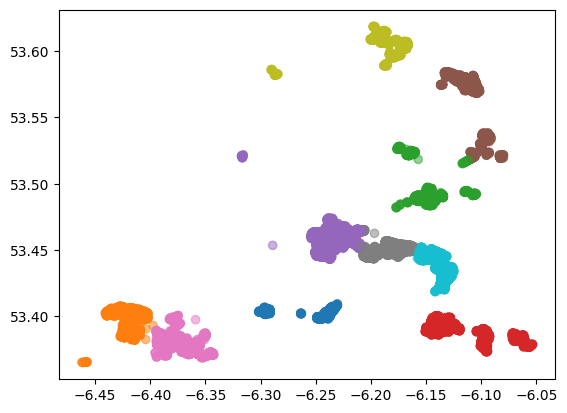

In [492]:
scatter = plt.scatter(df3['Longitude'], df3['Latitude'],c=kMeans_predicted[1],cmap='tab10', alpha=0.5)

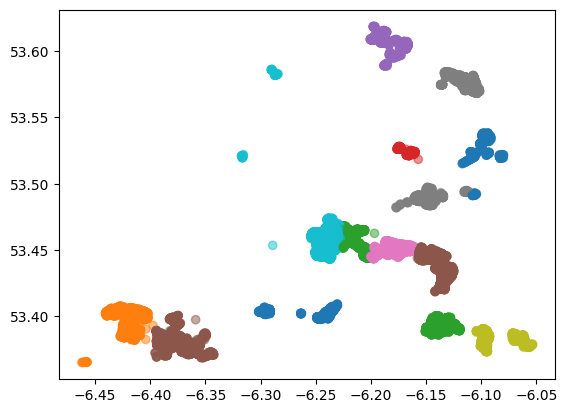

In [493]:
scatter = plt.scatter(df3['Longitude'], df3['Latitude'],c=kMeans_predicted[2],cmap='tab10', alpha=0.5)

21. DBSCAN clustering:

a) Using the same X variable as above, using the DBSCAN clustering algorithm, cluster the trees a total of 4 times, setting the eps parameter to 0.001, 0.005, 0.01, 0.05.

b) Make a scatterplot showing the results of each clustering, with one colour for each cluster. 
Suggestion: use a categorical colour map such as tab10 or tab20.
[2 marks]

In [494]:
#now do the same with dbscan
from sklearn.cluster import DBSCAN
DBSCAN_predicted = []
eps = [0.001, 0.005, 0.01, 0.05]
for i in eps:
    dbscan = DBSCAN(eps=i)
    dbscan.fit(X)
    y_pred = dbscan.labels_
    DBSCAN_predicted.append(y_pred)



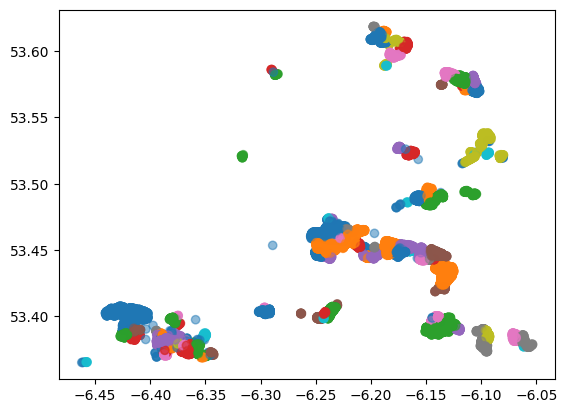

In [495]:
scatter = plt.scatter(df3['Longitude'], df3['Latitude'],c=DBSCAN_predicted[0],cmap='tab10', alpha=0.5)

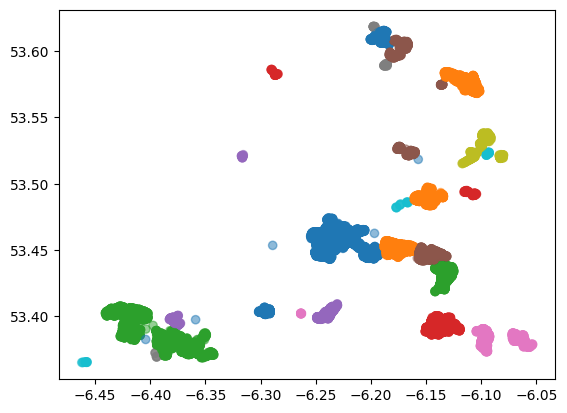

In [496]:
scatter = plt.scatter(df3['Longitude'], df3['Latitude'],c=DBSCAN_predicted[1],cmap='tab10', alpha=0.5)

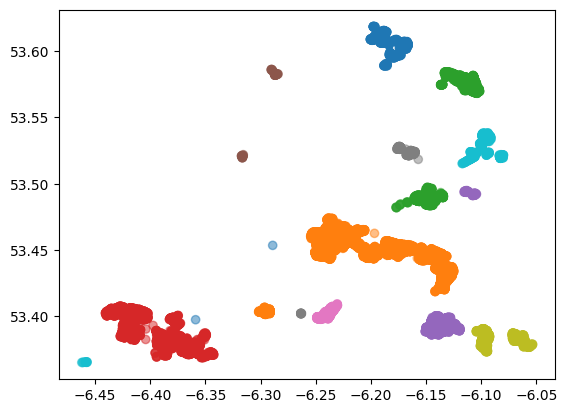

In [497]:
scatter = plt.scatter(df3['Longitude'], df3['Latitude'],c=DBSCAN_predicted[2],cmap='tab10', alpha=0.5)

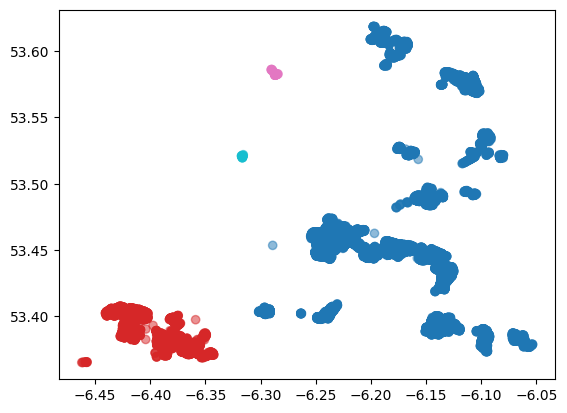

In [498]:
scatter = plt.scatter(df3['Longitude'], df3['Latitude'],c=DBSCAN_predicted[3],cmap='tab10', alpha=0.5)

22. Using the Silhouette score, compare the 3 runs of K-means and the 4 runs of DBSCAN. Which one of the 7 runs produces the 
best clustering, according to the Silhouette score? [2 marks]

In [499]:
#perform a sillhouette analysis
from sklearn.metrics import silhouette_score
k_means_silhouette_scores = {}
dbscan_silhouette_scores = {}
for i in range(3):
    txt = "K-Means with "+str(bins[i])+" bins"
    k_means_silhouette_scores[txt] = silhouette_score(X, kMeans_predicted[i])
for i in range(4):
    txt = "DBSCAN with "+str(eps[i])+" eps"
    dbscan_silhouette_scores[txt] = silhouette_score(X, DBSCAN_predicted[i])

print(k_means_silhouette_scores)
print(dbscan_silhouette_scores)

{'K-Means with 5 bins': 0.5961319175699399, 'K-Means with 10 bins': 0.6237793445586057, 'K-Means with 15 bins': 0.6408209571703001}
{'DBSCAN with 0.001 eps': 0.24654779191419357, 'DBSCAN with 0.005 eps': 0.5407076619493659, 'DBSCAN with 0.01 eps': 0.393094609216632, 'DBSCAN with 0.05 eps': 0.43883380804344585}


23. Using the Davies-Bouldin score, compare the 3 runs of K-means and the 4 runs of DBSCAN. Which one of the 7 runs produces the best clustering according to the Davies-Bouldin score? [2 marks]

In [500]:
#perform a Davies-Bouldin analysis
from sklearn.metrics import davies_bouldin_score
k_means_Davies_Bouldin_scores = {}
dbscan_Davies_Bouldin_scores = {}
for i in range(3):
    txt = "K-Means with "+str(bins[i])+" bins"
    k_means_Davies_Bouldin_scores[txt] = davies_bouldin_score(X, kMeans_predicted[i])
for i in range(4):
    txt = "DBSCAN with "+str(eps[i])+" eps"
    dbscan_Davies_Bouldin_scores[txt] = davies_bouldin_score(X, DBSCAN_predicted[i])

print(k_means_Davies_Bouldin_scores)
print(dbscan_Davies_Bouldin_scores)

{'K-Means with 5 bins': 0.5857437496702923, 'K-Means with 10 bins': 0.5334253184854487, 'K-Means with 15 bins': 0.4584454818285227}
{'DBSCAN with 0.001 eps': 1.304980996503088, 'DBSCAN with 0.005 eps': 0.8701655709920809, 'DBSCAN with 0.01 eps': 0.5967046437447137, 'DBSCAN with 0.05 eps': 0.44518863489975385}


24. Using another clustering algorithm (not K-means, not DBSCAN), and a range of hyperparameter values if appropriate, cluster the trees according to their latitude and longitude, as above. According to the silhouette and Davies-Bouldin scores, does any of your model runs produce better clustering? [2 marks]

In [501]:

from sklearn.cluster import AgglomerativeClustering
agglomerative_predicted = []
n_clusters = [5,10,15]
for i in n_clusters:
    agglomerative = AgglomerativeClustering(n_clusters=i)
    agglomerative.fit(X)
    y_pred = agglomerative.labels_
    agglomerative_predicted.append(y_pred)


In [502]:
Agglomerative_silhouette_scores = {}
for i in range(3):
    txt = "AgglomerativeClustering "+str(n_clusters[i])+" clusters"
    Agglomerative_silhouette_scores[txt] = silhouette_score(X, agglomerative_predicted[i])
print("silhouette_scores: ---------------------->")
print(Agglomerative_silhouette_scores)

Agglomerative_davies_bouldin_scores = {}
for i in range(3):
    txt = "AgglomerativeClustering with "+str(n_clusters[i])+" clusters"
    Agglomerative_davies_bouldin_scores[txt] = davies_bouldin_score(X, agglomerative_predicted[i])
print("davies_bouldin_scores: ---------------------->")
print(Agglomerative_davies_bouldin_scores)

silhouette_scores: ---------------------->
{'AgglomerativeClustering 5 clusters': 0.5797926764830069, 'AgglomerativeClustering 10 clusters': 0.6014323833756522, 'AgglomerativeClustering 15 clusters': 0.650415832559293}
davies_bouldin_scores: ---------------------->
{'AgglomerativeClustering with 5 clusters': 0.6239010143363466, 'AgglomerativeClustering with 10 clusters': 0.5501221097836109, 'AgglomerativeClustering with 15 clusters': 0.4361702688593319}


Text(0.5, 1.0, 'Silhouette Score Comparison')

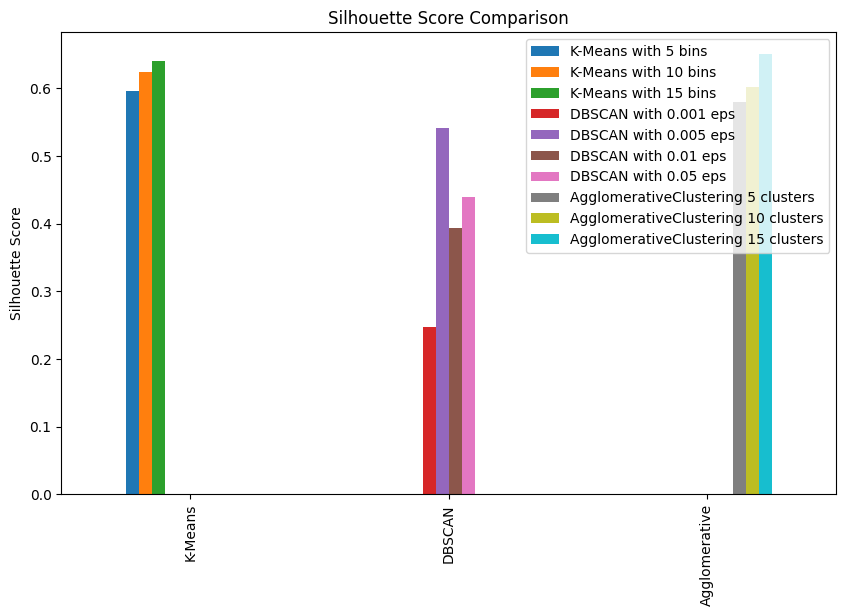

In [503]:
silhouettedf = pd.DataFrame([k_means_silhouette_scores, dbscan_silhouette_scores, Agglomerative_silhouette_scores])
silhouettedf.index = ['K-Means', 'DBSCAN', 'Agglomerative']
silhouettedf.plot(kind='bar', figsize=(10,6))
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Comparison')

Text(0.5, 1.0, 'Davies Bouldin Score Comparison')

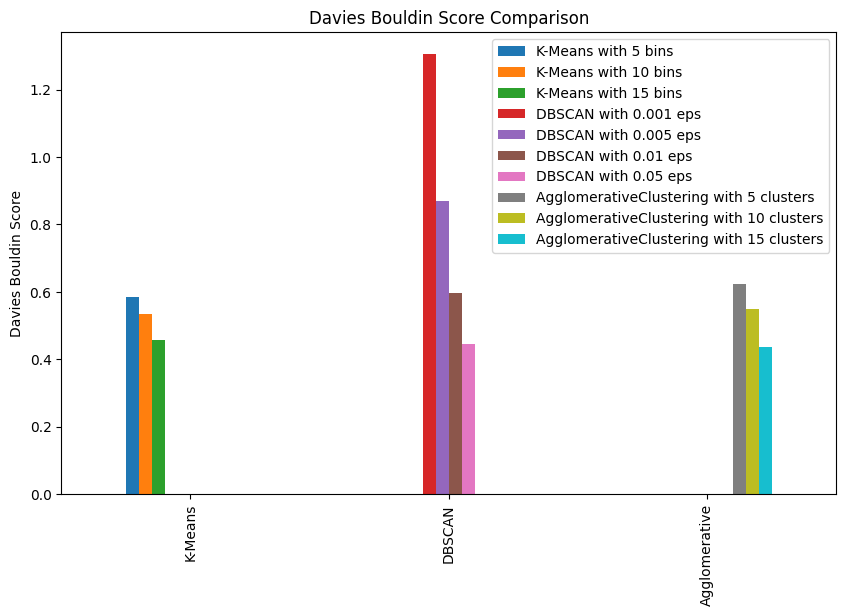

In [513]:
davies_bouldindf = pd.DataFrame([k_means_Davies_Bouldin_scores, dbscan_Davies_Bouldin_scores, Agglomerative_davies_bouldin_scores])
davies_bouldindf.index = ['K-Means', 'DBSCAN', 'Agglomerative']
davies_bouldindf.plot(kind='bar',figsize=(10,6))
plt.ylabel('Davies Bouldin Score')
plt.title('Davies Bouldin Score Comparison')

considering that lower Davies Bouldin scores and higher Silhouette scores imply better clustering, from the graphs above, it is indicated that using agglomerative with high clusters achieves the best result. K-means and low eps's dbscans is not to far from agglomerative despite this. But DBSCAN seems to achieve results which are not as good when employing high eps's.

25. Usually, DBSCAN takes longer than K-means to run, and the time it takes to run is affected by the eps parameter. Explain why that is the case. [4 marks]

The eps argument in the DBSCAN clustering algorithm defines the maximum distance between two data points for one to be considered as in the "neighborhood" of the other. A larger eps results in a larger neighborhood, potentially encompassing more data points. This means that for each data point a calculation has to be made to see how far it is from other datapoints and these calcuations increase with higher eps. Furthermore dbscan has to filter out outliers which requires more calculations to  be made 

26. Provide an example of one case in which it might be better to use DBSCAN rather than K-means, and an example of one case in which it might be better to use K-means rather than DBSCAN. Explain why, in both cases. [4 marks]

_____________________

# Part E – Model selection

27. Consider the figure in the PDF and compare models A and B. In each case, what difference would it make to add more training examples to the training set? Explain your reasoning. [4 marks]

28.	Consider the second figure in the PDF and compare models A, B, and C. What is the difference between the three models? How does that relate to the bias-variance trade-off? [6 marks]

**>>> Answer by editing this cell (double-click here)**

29.	What is overfitting? Why is that a problem, and how can one avoid it? [3 marks]

**>>> Answer by editing this cell (double-click here)**

________________

# Part F – Dimensionality reduction

Consider a scenario where you are working with a complex high-dimensional dataset derived from a biomedical application to detect a disease. The data is expected to have both linear and non-linear relationships, and you aim to reduce the dimensionality for the following purposes: first, to visualize the data in a lower-dimensional space to identify potential clusters or patterns that might indicate different disease states, and second, to preprocess the data for a downstream machine learning task, such as classification of samples into healthy or diseased states. 

30.	Discuss the advantages and disadvantages of using PCA, t-SNE, and UMAP for the visualization purpose, considering factors such as the preservation of local and global structures, computational efficiency, and the potential introduction of artifacts. [3 marks]

**>>> Answer by editing this cell (double-click here)**

31.	Explain how the choice between these dimensionality reduction techniques might change when, after visualising, you want to do the preprocessing for the machine learning task. [3 marks]

**>>> Answer by editing this cell (double-click here)**

32.	Discuss the role of interpretability and stability in the choice of dimensionality reduction technique for both tasks. How might the stochastic nature of t-SNE and UMAP influence the reproducibility of your analyses, and how can PCA's linear assumptions limit its usefulness in capturing complex relationships in the data? [3 marks]

**>>> Answer by editing this cell (double-click here)**

________________

# Part G – Applications of Machine Learning

33.	Discuss a scenario where a high accuracy rate might be misleading in evaluating the performance of a classifier. What other metrics would you consider, and why? [3 marks]

**>>> Answer by editing this cell (double-click here)**

34. Given a classification task and a dataset, sometimes it’s impossible to make a classifier with 100% precision and 100% recall simultaneously. Explain why. [3 marks]

**>>> Answer by editing this cell (double-click here)**

35. In the case of the question above, the data scientist might have to choose between having higher precision or higher recall. Provide an example where it’s preferable to get high recall and low precision (and explain why), and another example where it’s preferable to have high precision and low recall (and explain why). [4 marks]

**>>> Answer by editing this cell (double-click here)**

Over this module we explained many examples where a machine learning algorithm was trained on a dataset and became reasonably good at a task, but had a fundamental flaw in its training dataset or feature engineering that ultimately made the model inaccurate or inappropriate for use in real life.

36. Give an example of a machine learning algorithm trained for a particular task where it achieves high accuracy in one context, but low accuracy in another context. Explain what could cause that, how to diagnose it, and suggest a way to address it. [4 marks]

**>>> Answer by editing this cell (double-click here)**

37. Give an example of a machine learning algorithm that might have low errorin its training and testing datasets, but that still would have a fundamental flaw in its application that is not captured by the error metric. Explain why that is the case, and suggest a way to address that. [3 marks]

**>>> Answer by editing this cell (double-click here)**

_________________